In [1]:
# importing required modules
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# load the data as dataset
dataset = pd.read_csv(r'creditcard.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratory Data Analysis:

In [5]:
LABELS = ['NORMAL','FRAUD']

Text(0, 0.5, 'No. of Occurences')

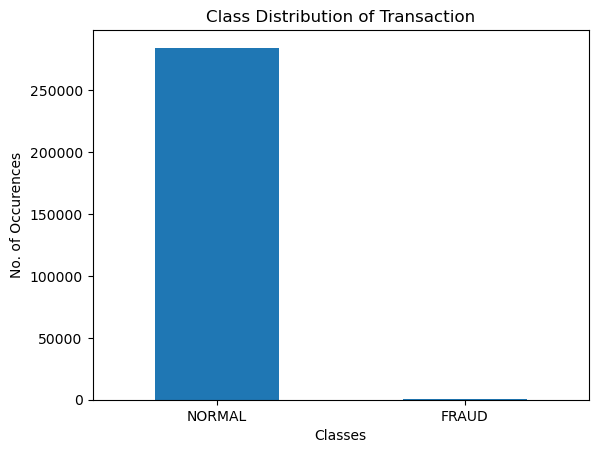

In [6]:
set_class = pd.value_counts(dataset['Class'],sort = True)
set_class.plot(kind = 'bar', rot = 0)
plt.title('Class Distribution of Transaction')
plt.xticks(range(2),LABELS )
plt.xlabel('Classes')
plt.ylabel('No. of Occurences')

In [7]:
fraud = dataset[dataset['Class']==1]
normal = dataset[dataset['Class']==0]

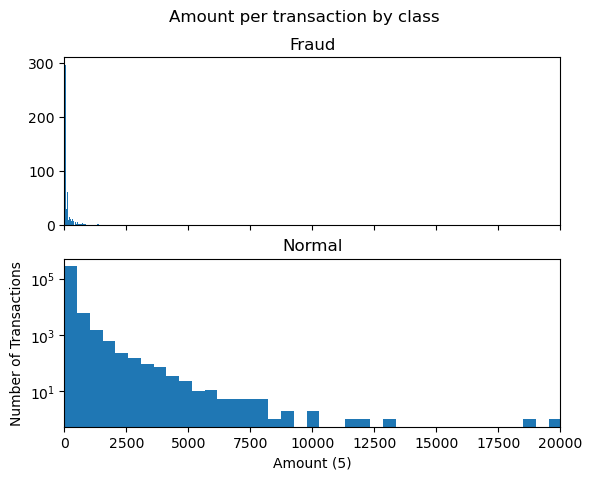

In [8]:
f, (ax1, ax2)= plt.subplots (2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud. Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal. Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount (5)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

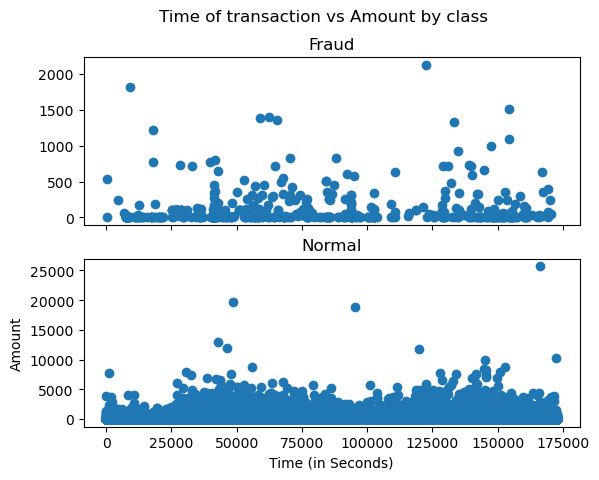

In [9]:
f, (ax1, ax2) = plt.subplots (2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount by class")
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel("Time (in Seconds)")
plt.ylabel('Amount')
plt.show()

# Data Cleaning:

In [10]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
dataset.isnull().values.any()

False

There are no missing values in data

In [12]:
dataset.shape

(284807, 31)

In [13]:
dataset.duplicated().any()

True

In [14]:
dataset = dataset.drop_duplicates()

In [15]:
dataset.shape

(283726, 31)

In [16]:
284807 - 283726    #old dataset - new dataset

1081

There were 1081 duplicates in dataset

# Dealing with Imbalanced data:

UNDERSAMPLING

In [17]:
fraud = dataset[dataset['Class']==1]
normal = dataset[dataset['Class']==0]

In [18]:
fraud.shape

(473, 31)

In [19]:
normal.shape

(283253, 31)

In [20]:
normal_sample = normal.sample(n = 473)

In [21]:
normal_sample.shape

(473, 31)

In [22]:
new_dataset = pd.concat([normal_sample,fraud],ignore_index = True)

In [23]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [24]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161100.0,-2.148571,-4.005352,-1.244728,1.124931,3.293106,-1.803833,-0.924504,0.137613,-1.452908,1.228905,-0.179461,-0.033616,-0.325089,0.934520,-0.484313,-1.961671,-0.287934,2.215613,0.050095,0.927255,0.457424,0.391065,1.524693,0.117292,-1.539993,-0.726946,0.202482,0.451846,277.78,0
1,121850.0,2.039719,0.200143,-1.704221,0.530821,0.192540,-1.436932,0.274004,-0.378397,0.571243,-0.485865,-0.278664,0.146584,0.111143,-0.745387,0.932774,0.138961,0.446386,0.397157,-0.506697,-0.195978,0.205571,0.772351,-0.019122,-0.073482,0.240532,-0.099212,0.000727,-0.030630,8.00,0
2,145310.0,-2.522884,-0.505823,-0.732464,-0.487336,1.364001,-0.682748,0.299515,0.574203,0.341368,-1.306395,0.291544,-0.558588,-2.248979,-0.931535,-0.748734,0.574963,0.982587,1.109726,0.482746,-0.480906,-0.312304,-0.500589,0.811396,0.095798,0.371168,-0.065152,0.063595,0.221887,60.16,0
3,96423.0,-0.824558,-0.578509,1.707312,-1.951234,-0.672483,-0.563182,0.511094,-0.312728,0.746948,-0.358944,0.009932,-3.696222,1.515490,0.666690,-0.780293,1.469098,0.350045,-0.517812,-0.612360,0.599837,0.319921,1.008937,0.095726,-0.013106,0.126896,-0.197266,0.091548,-0.027976,181.00,0
4,168332.0,-2.605978,3.081464,-1.672415,-1.196853,0.444424,-1.016978,0.921137,-0.031726,2.135987,2.847533,-0.308099,0.381486,0.762351,-2.019686,-0.131113,0.059829,0.202542,-0.495565,-0.580524,1.563634,-0.712486,-1.036965,0.249719,0.531703,0.241573,0.166753,1.452778,0.927770,4.99,0


Now both the classes have equal data and the dataset is now balanced

# Spliting the data into train & test sets

In [25]:
x = new_dataset.iloc[:,1:30].values
y =new_dataset.iloc[:,30].values

In [26]:
x.shape

(946, 29)

In [27]:
y.shape

(946,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [30]:
print("x_train.shape :"  , x_train.shape)
print("x_test.shape :"  ,  x_test.shape)
print("y_train.shape :"  , y_train.shape) 
print("y_test.shape :"  , y_test.shape)   

x_train.shape : (756, 29)
x_test.shape : (190, 29)
y_train.shape : (756,)
y_test.shape : (190,)


# Feature Engineering:

In [31]:
from sklearn.preprocessing import StandardScaler 

In [32]:
stdsc = StandardScaler()

In [33]:
new_dataset['Amount'] = stdsc.fit_transform(pd.DataFrame(new_dataset['Amount']))

In [34]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,161100.0,-2.148571,-4.005352,-1.244728,1.124931,3.293106,-1.803833,-0.924504,0.137613,-1.452908,1.228905,-0.179461,-0.033616,-0.325089,0.934520,-0.484313,-1.961671,-0.287934,2.215613,0.050095,0.927255,0.457424,0.391065,1.524693,0.117292,-1.539993,-0.726946,0.202482,0.451846,0.828695,0
1,121850.0,2.039719,0.200143,-1.704221,0.530821,0.192540,-1.436932,0.274004,-0.378397,0.571243,-0.485865,-0.278664,0.146584,0.111143,-0.745387,0.932774,0.138961,0.446386,0.397157,-0.506697,-0.195978,0.205571,0.772351,-0.019122,-0.073482,0.240532,-0.099212,0.000727,-0.030630,-0.418003,0
2,145310.0,-2.522884,-0.505823,-0.732464,-0.487336,1.364001,-0.682748,0.299515,0.574203,0.341368,-1.306395,0.291544,-0.558588,-2.248979,-0.931535,-0.748734,0.574963,0.982587,1.109726,0.482746,-0.480906,-0.312304,-0.500589,0.811396,0.095798,0.371168,-0.065152,0.063595,0.221887,-0.176963,0
3,96423.0,-0.824558,-0.578509,1.707312,-1.951234,-0.672483,-0.563182,0.511094,-0.312728,0.746948,-0.358944,0.009932,-3.696222,1.515490,0.666690,-0.780293,1.469098,0.350045,-0.517812,-0.612360,0.599837,0.319921,1.008937,0.095726,-0.013106,0.126896,-0.197266,0.091548,-0.027976,0.381459,0
4,168332.0,-2.605978,3.081464,-1.672415,-1.196853,0.444424,-1.016978,0.921137,-0.031726,2.135987,2.847533,-0.308099,0.381486,0.762351,-2.019686,-0.131113,0.059829,0.202542,-0.495565,-0.580524,1.563634,-0.712486,-1.036965,0.249719,0.531703,0.241573,0.166753,1.452778,0.927770,-0.431912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.347282,1
942,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.451460,1
943,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.095029,1
944,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.677213,1


# Model Training:

In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC()

In [37]:
model.fit(x_train,y_train)

SVC()

In [38]:
pred_value =model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(pred_value,y_test)

0.8157894736842105

The accuracy of the model is around 81%

#	Hyperparameter Tuning 

We will use RandomizedSearchCV 

In [42]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [43]:
x = np.asarray(x)
y = np.asarray(y)

In [44]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
                'C' :[1,5,10,20]
    
}

In [45]:
cls = RandomizedSearchCV(model,parameters,cv=5)

In [46]:
cls.fit(x,y)                    

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [47]:
cls.cv_results_

{'mean_fit_time': array([1.33365345e-01, 1.96302414e-02, 2.44508266e-02, 4.62178332e+01,
        1.10973835e-02, 4.50222969e-02, 1.48271084e-02, 2.01547146e-02,
        4.11613837e+01, 6.00715246e+01]),
 'std_fit_time': array([1.15139111e-01, 6.00535199e-03, 6.62933959e-03, 3.99174512e+01,
        4.69764788e-03, 1.57802408e-02, 4.23007743e-03, 4.94735218e-03,
        2.31846180e+01, 1.92759128e+01]),
 'mean_score_time': array([0.00312586, 0.00312529, 0.        , 0.00151005, 0.00440016,
        0.00323296, 0.00508485, 0.00667725, 0.00290084, 0.00068231]),
 'std_score_time': array([0.00625172, 0.00625057, 0.        , 0.00232673, 0.00343863,
        0.00436985, 0.00348364, 0.00578637, 0.00580168, 0.00094144]),
 'param_kernel': masked_array(data=['poly', 'rbf', 'sigmoid', 'linear', 'rbf', 'poly',
                    'rbf', 'rbf', 'linear', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
     

In [48]:
best_score = cls.best_score_
print(best_score)

0.9386633249791145


In [49]:
best_parameter = cls.best_params_
print(best_parameter)

{'kernel': 'linear', 'C': 10}


In [50]:
result = pd.DataFrame(cls.cv_results_)

In [51]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.133365,0.115139,0.003126,0.006252,poly,10,"{'kernel': 'poly', 'C': 10}",0.647368,0.582011,0.634921,0.613757,0.576720,0.610955,0.027993,8
1,0.019630,0.006005,0.003125,0.006251,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.926316,0.925926,0.835979,0.947090,0.867725,0.900607,0.041763,5
2,0.024451,0.006629,0.000000,0.000000,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.405263,0.417989,0.306878,0.455026,0.698413,0.456714,0.130398,10
3,46.217833,39.917451,0.001510,0.002327,linear,5,"{'kernel': 'linear', 'C': 5}",0.942105,0.931217,0.910053,0.952381,0.931217,0.933395,0.014076,3
4,0.011097,0.004698,0.004400,0.003439,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.921053,0.931217,0.846561,0.936508,0.878307,0.902729,0.034755,4
5,0.045022,0.015780,0.003233,0.004370,poly,5,"{'kernel': 'poly', 'C': 5}",0.531579,0.571429,0.634921,0.582011,0.571429,0.578273,0.033157,9
6,0.014827,0.004230,0.005085,0.003484,rbf,5,"{'kernel': 'rbf', 'C': 5}",0.915789,0.925926,0.830688,0.947090,0.851852,0.894269,0.044938,6
7,0.020155,0.004947,0.006677,0.005786,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.857895,0.820106,0.730159,0.899471,0.761905,0.813907,0.061664,7
8,41.161384,23.184618,0.002901,0.005802,linear,10,"{'kernel': 'linear', 'C': 10}",0.963158,0.931217,0.910053,0.952381,0.936508,0.938663,0.018258,1
9,60.071525,19.275913,0.000682,0.000941,linear,20,"{'kernel': 'linear', 'C': 20}",0.963158,0.936508,0.904762,0.952381,0.936508,0.938663,0.019732,2


In [52]:
randomized_search_result = result[['param_kernel','param_C','mean_test_score']]
print(randomized_search_result)

  param_kernel param_C  mean_test_score
0         poly      10         0.610955
1          rbf      10         0.900607
2      sigmoid      10         0.456714
3       linear       5         0.933395
4          rbf      20         0.902729
5         poly       5         0.578273
6          rbf       5         0.894269
7          rbf       1         0.813907
8       linear      10         0.938663
9       linear      20         0.938663


# Model Improvement 

In [53]:
model = SVC( C=10, kernel='linear')

In [54]:
model.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [55]:
pred_value =model.predict(x_test)

In [56]:
accuracy_score(pred_value,y_test)

0.9368421052631579

Highest Accuracy : 93.68%  

The Best Parameter : ( C ='10' , kernel ='linear')